<a href="https://colab.research.google.com/github/noorulhudaaaa/Python-AI-Chatbot-Bootcamp-WPBrigade-iCodeGuru/blob/main/Day%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - EDA
- Data Cleaning  -  Filling missing values, identify outliers, smooth out noisy data, correct inconsistent data.
- Data Integration
- Data Reduction

---
- Can use 'Z-Score' to identify outliers ( Any datavalue with Z-score less than -3 and greater than +3 is an outlier.
``` php
Z-score = (Value - Mean) / Standard Deviation
```
- Can use 'IQR' for identifying outliers too.
``` php
Q1 = df['column'].quantile(0.25)
Q3 = df['column'].quantile(0.75)
```
```php
IQ = Q3 - Q1
```
``` php
Lower limit = Q1 − 1.5 × IQR
Upper limit = Q3 + 1.5 × IQR
```
Below the lower limit, or above the upper limit is considered an outlier.

In [149]:
# Importing our libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [150]:
# We want to see all rows of our dataset
pd.set_option('display.max.rows', None)


In [151]:
# Loading our dataset
df = pd.read_csv('Life Expectancy Data.csv')

## 1. Statistical Analysis

In [118]:
# Checking the first 5 rows
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [120]:
# Checking the last 5 rows
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [121]:
# Checking the total columns and rows
df.shape


(2938, 22)

In [122]:
# Checking all the columns
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [123]:
# Checking information about this data, how many non null entries and datatypes of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [124]:
# Checking the basic statistics of dataset
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [125]:
# Getting the stats for the non- numerical(object) type data using include
df.describe(include = ['object', bool])


,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


## 2. Data Preprocessing

### 1. Dealing with Missing Values

In [152]:
# Finding total null values rows in each column
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [153]:
# Dropping those rows which are null , how = any tell any null values found
df.dropna(how = 'any', inplace = True)


In [154]:
# Checking the total null value rows again
df.isnull().sum()

# Null rows have been removed

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [129]:
# checking first 5 rows again
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 2. Data Transformation

In [155]:
# Value for life expectancy is large so the system might treat value for alcohol less important.
# IMPORTING LIBRARY for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [156]:
# Applying MinMaxScaler on Life Expectancy
scaler = MinMaxScaler()
df['Life expectancy '] = scaler.fit_transform(df[['Life expectancy ']])


In [132]:
# Checking first 4 rows
df.head(4)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0.466667,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0.353333,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0.353333,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0.344444,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8


In [157]:
# Now we will do the same for 'Adult Mortality' column aswell but will use StandardScaler
# Importing library for that
from sklearn.preprocessing import StandardScaler


In [158]:
# Using StandardScaler
standard = StandardScaler()
df['Adult Mortality'] = standard.fit_transform(df[['Adult Mortality']])


In [135]:
# Checking first 5 rows now
df.head()

#StandardScaler() Has been applied on 'Adult Mortality' column


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0.466667,0.756629,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0.353333,0.820490,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0.353333,0.796542,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0.344444,0.828472,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0.337778,0.852420,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 3. Identifying Outliers


IQR

In [159]:
# Identifying outliers using IQR Method
# For example doing it on Life Expectancy column
def iqr_outliers(s):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    return s[(s < Q1 - 1.5 * IQR) | (s > Q3 + 1.5 * IQR)]

# Giving the data
data = df['Life expectancy ']


# Calling the function
print("Outliers:\n", iqr_outliers(data))


Outliers:
 56      0.093333
347     0.091111
348     0.053333
349     0.044444
350     0.060000
351     0.084444
1481    0.084444
1482    0.048889
1483    0.028889
1484    0.011111
1485    0.017778
1486    0.033333
1578    0.100000
1579    0.068889
1580    0.044444
1581    0.024444
1582    0.013333
1583    0.000000
2298    0.091111
2302    0.091111
2303    0.068889
2304    0.048889
2305    0.028889
2498    0.084444
2499    0.044444
2500    0.035556
2501    0.042222
2502    0.053333
2503    0.068889
2504    0.097778
2929    0.093333
2930    0.057778
2931    0.031111
2932    0.013333
2933    0.006667
2934    0.011111
2935    0.017778
2936    0.028889
2937    0.044444
Name: Life expectancy , dtype: float64


In [137]:
# Doing it on a sample dataset

data = pd.DataFrame([10,12,12,13,12,11,300,12,11,10])
print(iqr_outliers(data).dropna().values)

[[300.]]


Z - Score

In [160]:
# Importing necessary values
import pandas as pd
from scipy import stats
import numpy as np


In [161]:
# Creating a dataframe
data = pd.Series([10, 12, 11, 13, 12, 11, 300, 12, 10, 11])


In [162]:
# Calculating Z-scores
# np.abs removes the minus sign if there is one
Z_Score = np.abs(stats.zscore(data))

In [163]:
# Identifying threshold
outliers = data[Z_Score > 3]

# Printing results
print("Z-scores:\n", Z_Score)
print()
print("Outliers:\n", outliers)


Z-scores:
 [0.34871119 0.32561774 0.33716447 0.31407101 0.32561774 0.33716447
 2.99984    0.32561774 0.34871119 0.33716447]

Outliers:
 Series([], dtype: int64)


## Correlation Analysis

In [164]:
# Checking the correlation of all the columns
# Decding the figure size
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

# show heatmap
plt.show()

# Snce afghanistan is a catagorical data, we need to encode first

ValueError: could not convert string to float: 'Afghanistan'

<Figure size 2000x1000 with 0 Axes>

## Encoding

In [165]:
# We have 2 catagorical column, Country and Status
# Importing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [171]:

le = LabelEncoder()

# Apply label encoding and replace original columns
for col in ['Country', 'Status']:
    df[col] = le.fit_transform(df[col])

# Print encoded columns
print("Country: " , df['Country'].unique())
print()
print("Status: ", df['Status'].unique())


Country:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132]

Status:  [1 0]


In [172]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,0.466667,0.756629,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,0.353333,0.820490,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,0.353333,0.796542,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,0.344444,0.828472,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,0.337778,0.852420,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [102]:
# Taking dummy data
le = LabelEncoder()

data = ["Red", "Green", "Blue", "Red"]
df = le.fit_transform(data)

print("After Encoding:\n", df)


After Encoding:
 [2 1 0 2]


One Hot Encoder

In [106]:
# Taking dummy data
data = ["Red", "Green", "Blue", "Red"]
df = pd.get_dummies((data))

print("After Encoding:\n", df)

After Encoding:
     Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False  False   True


In [98]:
oe = OneHotEncoder()

# Taking dummy data
data = np.array([["Red"], ["Green"], ["Blue"], ["Red"]])
df = oe.fit_transform(data).toarray()

print("After Encoding:\n", df)


After Encoding:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Ordinal Encoder

In [108]:
# importing library
from sklearn.preprocessing import OrdinalEncoder

In [113]:
# Getting dummy data
data = np.array([["Red"], ["Green"], ["Blue"], ["Red"]])

# Providing order
df = OrdinalEncoder(categories = [['Red', 'Green', 'Blue']])
df = df.fit_transform(data)
print(df)


[[0.]
 [1.]
 [2.]
 [0.]]


In [175]:
# Checking correlation
df.corr()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,-0.018344,0.079464,-0.112797,0.096978,-0.026246,-0.107650,-0.122095,0.013179,-0.035006,...,0.011280,-0.021885,-0.036725,0.149061,-0.118019,-0.018489,-0.023566,0.009962,-0.080718,-0.055855
Year,-0.018344,1.000000,0.034138,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,...,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Status,0.079464,0.034138,1.000000,-0.442798,0.278173,0.108757,-0.607782,-0.461688,-0.140351,0.071963,...,-0.201917,-0.192538,-0.201654,0.129555,-0.484801,0.034790,0.308005,0.307279,-0.463615,-0.512543
Life expectancy,-0.112797,0.050771,-0.442798,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,...,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,0.096978,-0.037092,0.278173,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,...,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,-0.026246,0.008029,0.108757,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,...,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.107650,-0.113365,-0.607782,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,...,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,-0.122095,0.069553,-0.461688,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,...,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.013179,0.114897,-0.140351,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,...,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.035006,-0.053822,0.071963,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,...,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660


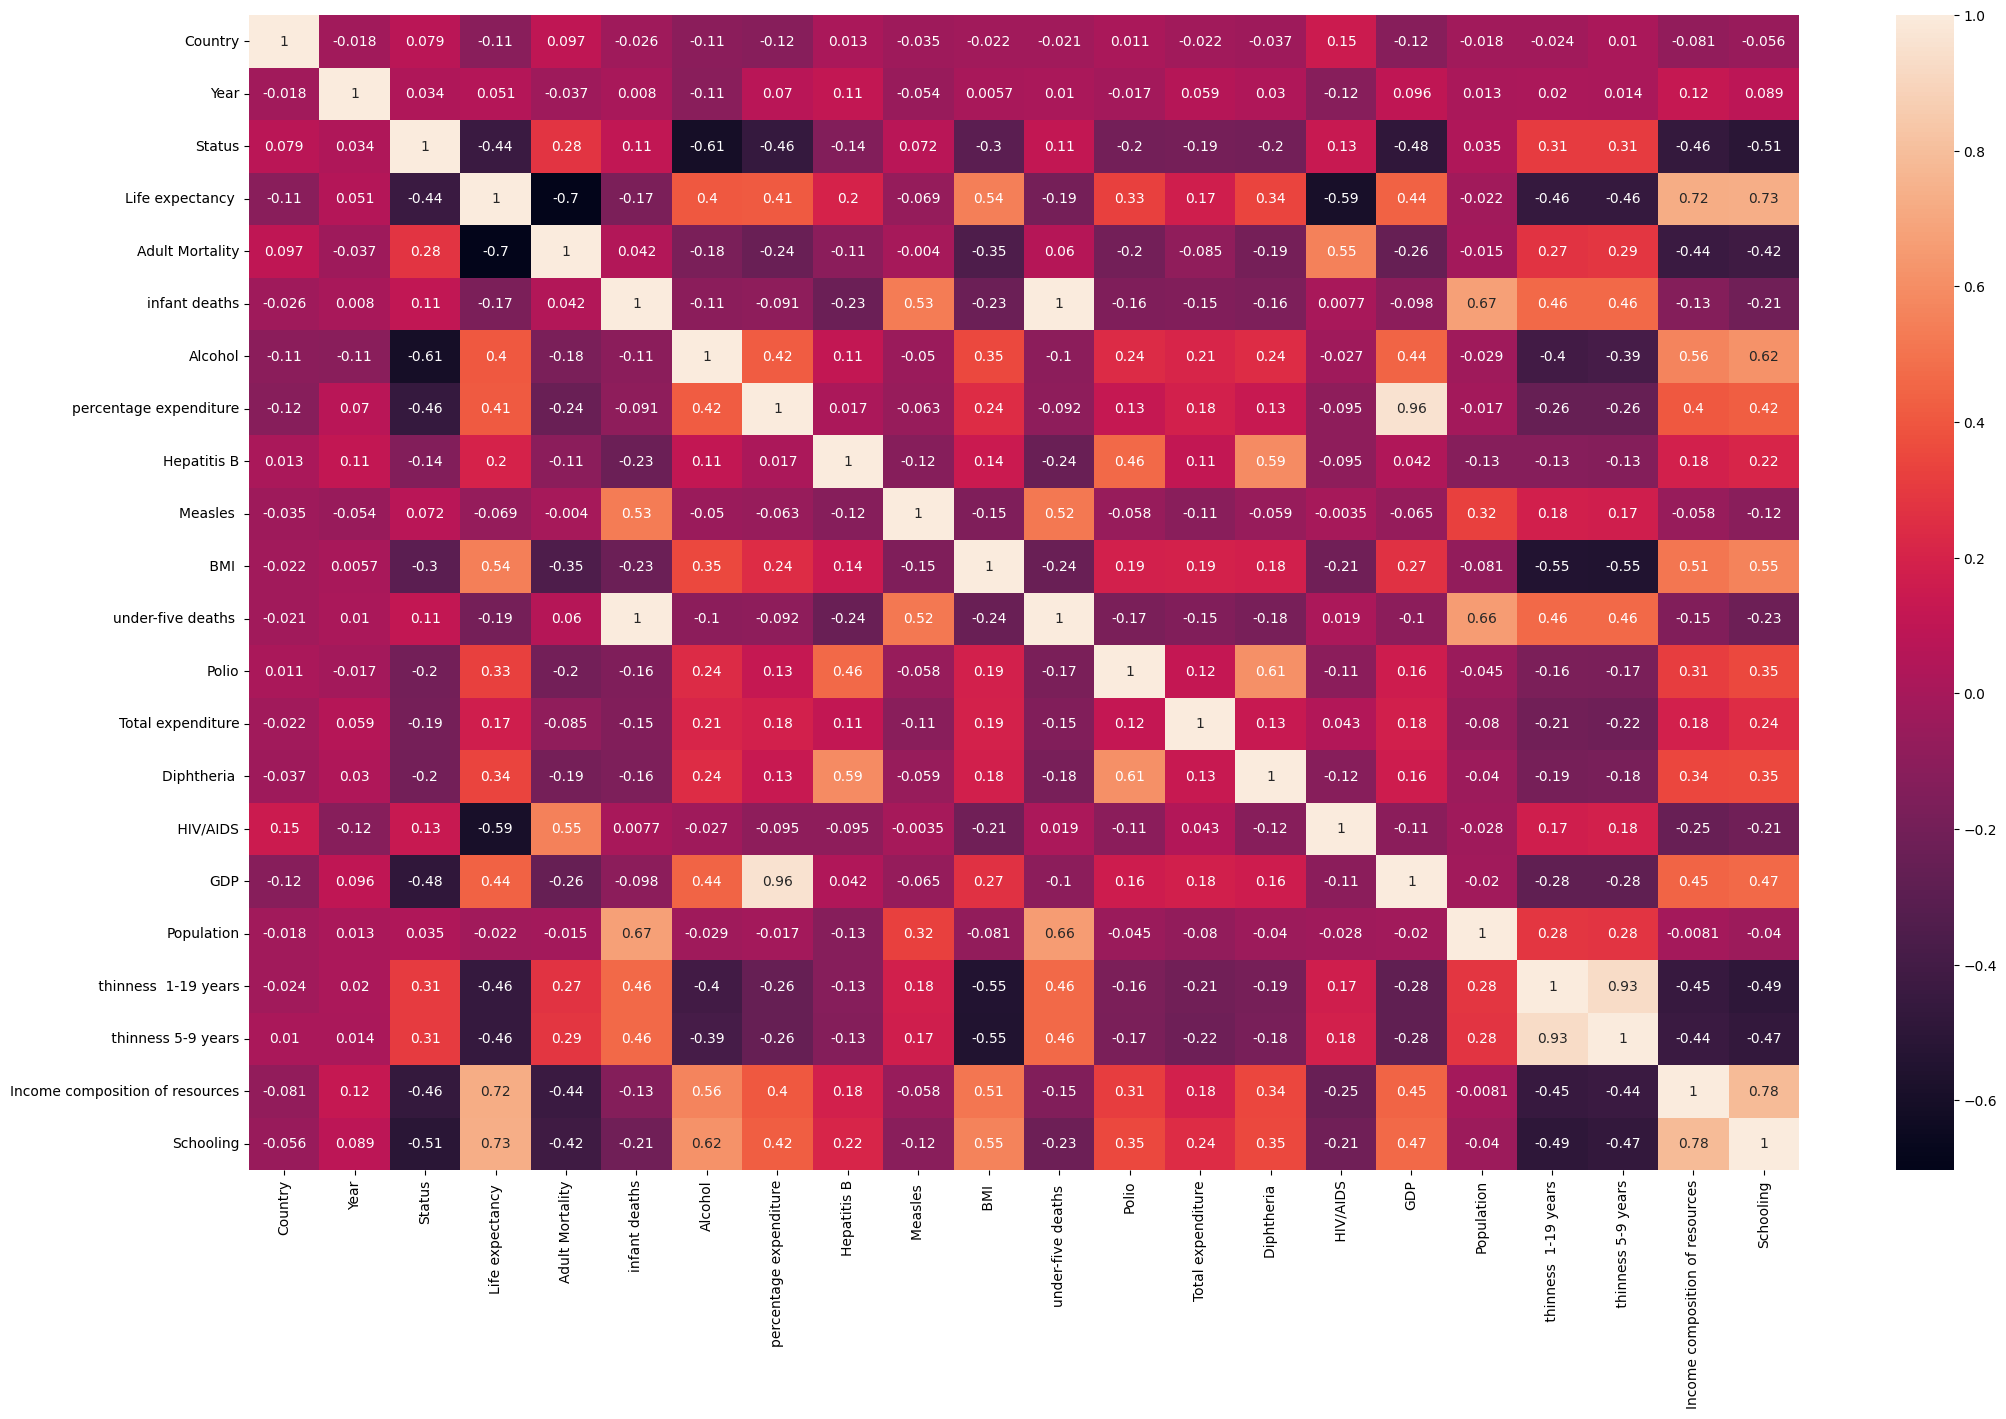

In [176]:
# Since our catagorical data has been encoded, we will now see correlation
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Splitting Data for Training and Testing

In [180]:
# Dividing data into x and y
# y is the one to be predicted
# x will be used to predict y
y = df['Life expectancy ']

# Since life expectancy has to be predicted, we will drop it from x
x = df.drop('Life expectancy ', axis = 1)


In [181]:
# Importing library for training and testing
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)